<h2>Task 3: Credit risk analysis</h2>
Analyze a book of loans to estimate a customer's probability of default

<h3>Here is the background information on your task:</h3>
You have now moved to a new team assisting the retail banking arm, which has been experiencing higher-than-expected default rates on personal loans. Loans are an important source of revenue for banks, but they are also associated with the risk that borrowers may default on their loans. A default occurs when a borrower stops making the required payments on a debt.

The risk team has begun to look at the existing book of loans to see if more defaults should be expected in the future and, if so, what the expected loss will be. They have collected data on customers and now want to build a predictive model that can estimate the probability of default based on customer characteristics. A better estimate of the number of customers defaulting on their loan obligations will allow us to set aside sufficient capital to absorb that loss. They have decided to work with you in the QR team to help predict the possible losses due to the loans that would potentially default in the next year.

Charlie, an associate in the risk team, who has been introducing you to the business area, sends you a small sample of their loan book and asks if you can try building a prototype predictive model, which she can then test and incorporate into their loss allowances.

<h3>Here is your task:</h3>
The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

You should produce a function that can take in the properties of a loan and output the expected loss.
You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

In [20]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the provided loan dataset
data = pd.read_csv("Task 3 and 4_Loan_Data.csv")
data.shape

(10000, 8)

In [3]:
# let's look at the first five records
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
# check the datatypes present
data.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [5]:
# descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,4.974577e+06,2.293890e+06,1.000324e+06,2.977661e+06,4.989502e+06,6.967210e+06,8.999789e+06
credit_lines_outstanding,10000.0,1.461200e+00,1.743846e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
loan_amt_outstanding,10000.0,4.159677e+03,1.421399e+03,4.678397e+01,3.154235e+03,4.052377e+03,5.052898e+03,1.075068e+04
total_debt_outstanding,10000.0,8.718917e+03,6.627165e+03,3.165273e+01,4.199836e+03,6.732407e+03,1.127226e+04,4.368878e+04
income,10000.0,7.003990e+04,2.007221e+04,1.000000e+03,5.653987e+04,7.008583e+04,8.342917e+04,1.484122e+05
years_employed,10000.0,4.552800e+00,1.566862e+00,0.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01
fico_score,10000.0,6.375577e+02,6.065791e+01,4.080000e+02,5.970000e+02,6.380000e+02,6.790000e+02,8.500000e+02
default,10000.0,1.851000e-01,3.883981e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
# concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [7]:
# check for null / missing values
data.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [9]:
# let's drop customer_id as it is unique for every customer
data = data.drop(['customer_id'], axis=1)
data.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [10]:
# check for dusplicate records
data.duplicated().sum()

0

#### Insights:
 - There are total of 10000 records and 8 features in our dataset out of which "default" is our target column.
 - There are no null/missing values or duplicates that were found in the dataset.

### Univariate Analysis:

#### default

In [15]:
# default
data['default'].value_counts()

0    8149
1    1851
Name: default, dtype: int64

#### credit_lines_outstanding

In [16]:
# credit_lines_outstanding
data["credit_lines_outstanding"].value_counts()

0    4128
1    2590
5    1297
2     902
3     599
4     484
Name: credit_lines_outstanding, dtype: int64

#### years_employed

In [17]:
# years_employed
data['years_employed'].value_counts()

5     2574
4     2116
3     1763
6     1670
2      688
7      664
8      275
1      164
9       43
0       32
10      11
Name: years_employed, dtype: int64

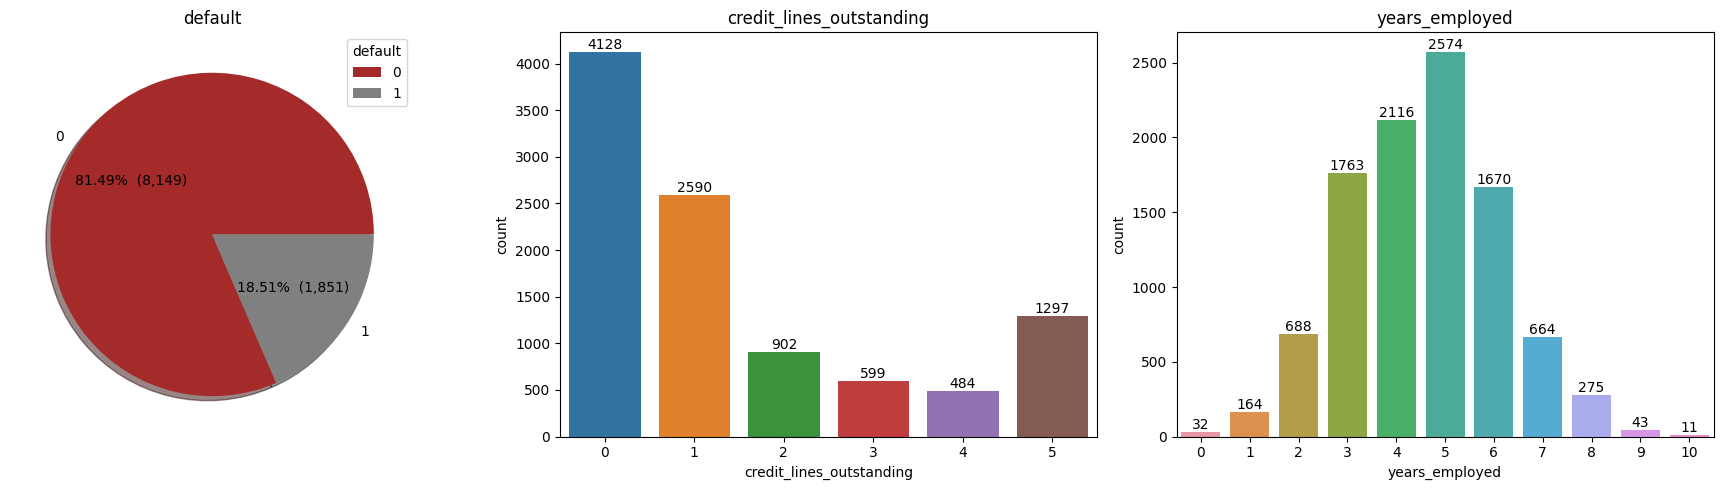

In [28]:
# Let's visualize above information
plt.figure(figsize=(18,5))

# default

ax1 = plt.subplot2grid((1,3), (0,0))

datadefault = data['default'].value_counts().values
labelsdefault = data['default'].value_counts().index

plt.pie(x=datadefault, labels=labelsdefault, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(datadefault)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsdefault, loc='upper right', title='default')
plt.title("default")

# credit_lines_outstanding

ax2 = plt.subplot2grid((1,3), (0,1))

sns.countplot(x="credit_lines_outstanding", data=data, ax=ax2)
for i in ax2.containers:
        ax2.bar_label(i)
plt.title("credit_lines_outstanding")

# years_employed

ax3 = plt.subplot2grid((1,3), (0,2))

sns.countplot(x="years_employed", data=data, ax=ax3)
for i in ax3.containers:
        ax3.bar_label(i)
plt.title("years_employed")

plt.tight_layout()
plt.show()

#### Insights:
 - 18.51% customers have defaulted on the loan as compared to 81.49% who do not. This shows that our data is highly imbalanced.
 - 4128 customers i.e. 41.28% customers do not have any outstanding credit lines whereas 25.90% have 1 and 12.97% have 5 outstanding credit lines.
 - Most of the customers in our data have been employed for 3 to 6 years.